In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import networkx as nx
from pyvis.network import Network


import community
import numpy as np


#pip install python-louvain
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from modules import components
import unidecode
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ctbw = pd.read_csv("../data/csv/sentiments_books.csv", encoding = 'utf-8')
ctbw['weight_inv'] = 1/ctbw.Weight
ctbw.head()

,Source,Target,Weight,Book,vader,weight_inv
0,valmiki,rama,1,1,0.8172,1.0
1,kaikeyi,lakshman,1,2,0.8658,1.0
2,janak,rohini,1,2,0.9168,1.0
3,rohini,rama,1,2,0.3919,1.0
4,sringavera,ganga,1,2,0.5106,1.0


In [3]:
graphs = [nx.from_pandas_edgelist(
          ctbw[ctbw.Book==i],
          source='Source', target='Target',
          edge_attr=['Weight', 'weight_inv', 'vader'])
          for i in range(1, 7)]

In [7]:
"""# try nx's girvan newman"""
partitions = []
for i in range(0, 6):
    G = graphs[i]
    # Find modularity
    part = community.best_partition(G)
    partitions.append(part) # returns dict = node: cluster
    mod = community.modularity(part,G)
len(partitions)

6

In [4]:
import colorsys
def scalar_to_hex(old_value, old_min, old_max):
    # old_min = -1, old_max = 1 :: vader
    # frequencies(range - 0,42)
    new_max = 1
    new_min = 0.1
    new_value = ( (old_value - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min

    rgb = colorsys.hsv_to_rgb(new_value, 1, 1)
    rgbhex = "".join("%02X" % round(i*255) for i in rgb)

    return '#' + rgbhex
scalar_to_hex(0.80520, -1, 1)

'#FF0086'

In [5]:
def sem_color(val):
    if val > 0.05:
        #positive
        color = 'green'
    if val < 0.05:
        color = 'red'
    return color

In [8]:
def sent_clusts():
    # sets colors(node, edges), calcs theme(ie., sentiment aggregate for each relation)
    theme = [] #pos, neg tuple for each book
    for i in range(6):
        graph = graphs[i] 
        part = partitions[i]
        nodes = graph.nodes()
        values = [part.get(node) for node in graph.nodes()]

        nmap = {k:scalar_to_hex(v, 1, 42) for k, v in zip(nodes, values)} # node clusters
        emap = {} # sentiment colors +ve- red, -ve blue
        pos = 0 #no. of p+ve relations
        neg = 0
        for (source, target), attr in graph.edges.items():
            # emap[(source, target)] = scalar_to_hex(attr['vader'], -1, 1)
            emap[(source, target)] = sem_color(attr['vader'])
            if attr['vader'] > 0.05:
                pos += 1
            elif attr['vader'] < 0.05:
                neg += 1

        print(nmap['rama'])
        for (source, target), attr in graph.edges.items():
            graph.nodes[source]['color'] = nmap[source]
            graph.nodes[target]['color'] = nmap[target]
            graph.edges[(source, target)]['color'] = emap[((source, target))]
        theme.append((pos, neg))
    return theme
themes = sent_clusts()


#FF7700
#58FF00
#FF9900
#FFBB00
#9BFF00
#FF7700


In [9]:
themes[4]#if u subtract : pos-neg val in this, then you will get how much more positive a b is then it is -ve
# gives a quantiative measure that is also sensible, cos, it gets normalised - not skewed as(3,0) and (40, 50)

(110, 73)

In [9]:
# THEMES
pos = []
neg = []
for i in range(len(themes)):
    if themes[i][0] > themes[i][1]:
        #positive - index 0
        pos.append(i)
    else:
        neg.append(i)
len(pos)
neg
# all book themes are positive?
# the mahabharata would be the opposite lol

[]

In [26]:
# nt = Network(height="1000px", width="100%", bgcolor="#222222", font_color="white",directed=True)
# nt = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", select_menu=True)
nt = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", directed = False, filter_menu=True)
# filter via color- if nodes(centrality by type)/edges(weight if connection) are given colors
# then for eg, u will b able to select all nodes with centrality above a certain threshold 
# or all the strongest connections via edge color filtering(doubt that wll happen here tho)

#lots of options for differentiating nodes by attributes:
# for eg, u give different colors over a spectrum for connectivity of nodes, 
#and different shapes if they belong to diff partitions(clusters), also filter by size etc as req

# ngram queries also possible here only
# for eg: select rama+ a bunch of others and another unrelated node like kosala: u can see how all of tem relate
nt.from_nx(graphs[2])
# nt.set_options()
# nt.options.edges.Color = 'red'
# nt.options.edges.Color(c)
# nt.show_buttons(filter_=['edges'])

neighbor_map = nt.get_adj_list()

for node in nt.nodes:
                node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
                node["value"] = len(neighbor_map[node["id"]])


nt.show('g1.html', notebook=False)
# nt.show_buttons(filter_=['physics'])



{'bharat': {'asvapati',
  'ayodhya',
  'bharadvaja',
  'brahma',
  'chitrakuta',
  'dandak',
  'dasaratha',
  'dhrishti',
  'dhruvasandhi',
  'gandharva',
  'gopa',
  'guha',
  'ikshvaku',
  'indra',
  'kaikeyi',
  'kalinga',
  'kausalya',
  'kekaya',
  'kosala',
  'lakshman',
  'nishadas',
  'raghu',
  'rajagriha',
  'rama',
  'satrughna',
  'sita',
  'sudama',
  'sumantra',
  'talajanghas',
  'vasishtha',
  'yama'},
 'satrughna': {'asvapati',
  'ayodhya',
  'bharat',
  'dandak',
  'dasaratha',
  'ganga',
  'ikshvaku',
  'kaikeyi',
  'kausalya',
  'lakshman',
  'raghu',
  'rama',
  'sita',
  'sringavera',
  'sumantra',
  'sumitra',
  'vamadeva',
  'vasishtha',
  'yayati'},
 'sita': {'anasuya',
  'ayodhya',
  'bharadvaja',
  'bharat',
  'brahma',
  'chitrakuta',
  'dandak',
  'dasaratha',
  'ganga',
  'guha',
  'ikshvaku',
  'kaikeyi',
  'kalindi',
  'kausalya',
  'lakshman',
  'lakshmi',
  'mandar',
  'raghu',
  'rama',
  'rohini',
  'satrughna',
  'sumantra',
  'sumitra',
  'videhan'

## Centrality

### Degree Centrality

In [10]:
def DegreeCentrality(graphs):
    deg = {}
    for i in range(len(graphs)):
        deg[i] = nx.degree_centrality(graphs[i])
    return deg

In [11]:
deg = DegreeCentrality(graphs)
for d in deg.values():
    print(d['rama']/6)

0.16666666666666666
0.03654188948306595
0.041176470588235294
0.04296875
0.05180180180180181
0.0588235294117647


In [12]:
sorted(deg[3].items(), key=lambda x:x[1], reverse=True)[0:10]


[('rama', 0.2578125),
 ('sita', 0.15625),
 ('indra', 0.140625),
 ('ravan', 0.140625),
 ('raghu', 0.109375),
 ('lakshman', 0.109375),
 ('dushan', 0.109375),
 ('khara', 0.078125),
 ('brahma', 0.0703125),
 ('dandak', 0.0703125)]

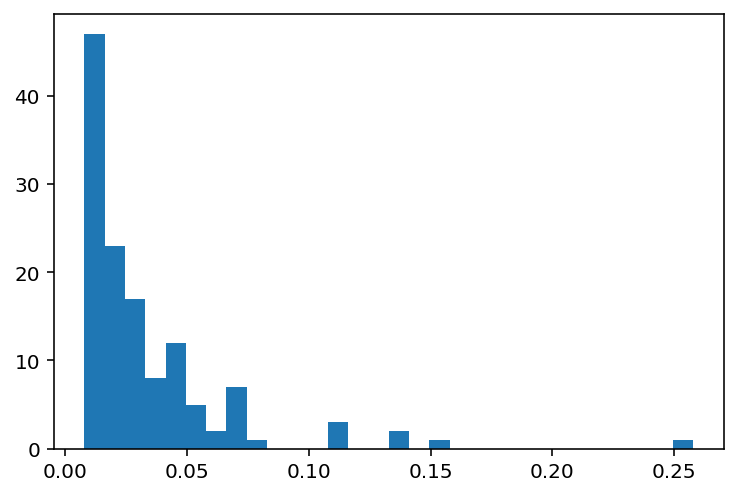

'deg centrality(x), no.of.chars(y): @0.25-rama, most people have very low deg, ppl over higher deg sparse'

In [13]:
plt.hist(deg[3].values(), bins=30)
plt.show()
"""deg centrality(x), no.of.chars(y): @0.25-rama, most people have very low deg, ppl over higher deg sparse"""

In [14]:
#Deg cen of various chars over various books
# evol = [nx.degree_centrality(graph) for graph in graphs]
# evol = [v for v in deg.values()] #not normalised list of all 6 dicts

"""Above, Rama has really weird plot, cos there are only 2 people in the 1st book, 
therefore the deg cen of both chars is 1
Therefore, to get actual comparison of how the importance of a character vs other chars evolves
need to normalise on the basis of dc of other chars in the same book
Or scale: from highest dc, lowest dc to 0,1"""
# Normalising for this 
def gen_centrality_plot(centralities):#ip dict of centralities of all books
    deg = centralities
    deg_list = [] #normalised dict of dcs for each book
    for d in deg.values(): #for each book
        new_vals = {}
        sorted_vals = sorted(d.items(), key=lambda x:x[1], reverse=True)
        for k in d:
            old_value = d[k]
            old_min = sorted_vals[-1][1]
            old_max = sorted_vals[0][1]
            new_max = 1
            new_min = 0
            new_value = ( (old_value - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min
            new_vals[k] = new_value
        deg_list.append(new_vals)

    evol_df = pd.DataFrame.from_records(deg_list, index=[i+1 for i in range(len(deg))]).fillna(0)
    plot_list = ['rama', 'kaikeyi','lakshman', 'sita', "dasaratha", 'hanuman', 'bharat', 'ayodhya',
                'ravan', 'kumbhakarna', 'vibhishan']
    print(evol_df.shape)
    plt.figure(figsize=(10,10))

    evol_df[plot_list].plot()
    plt.yticks(np.arange(0.0, 1.0, 0.1))
    plt.xticks(np.arange(1, 6, 1))

    plt.show()

### Betweenness Centrality

In [15]:
def BtwCentrality(graphs):
    btw = {}
    for i in range(1, len(graphs)):
        btw[i] = nx.betweenness_centrality(graphs[i])
    return btw

In [16]:
# First check unweighted (just the structure)
btw = BtwCentrality(graphs)
sorted(btw[3].items(), key=lambda x:x[1], reverse=True)[0:10]


[('rama', 0.33588930300406966),
 ('garud', 0.22109990157480308),
 ('indra', 0.21189553767552102),
 ('vinata', 0.19094488188976377),
 ('pulastya', 0.14968832020997377),
 ('sita', 0.1291965029271074),
 ('surasa', 0.12721456692913385),
 ('ravan', 0.1235353868492041),
 ('anala', 0.09891732283464567),
 ('brahma', 0.059902473128358946)]

In [17]:
# Let's care about interactions now

sorted(nx.betweenness_centrality(graphs[3],
       weight='Weight').items(),
       key=lambda x:x[1], reverse=True)[0:10]
"""try with weight_inv: if it makes sense, construct the all graphs dict with it"""



'try with weight_inv: if it makes sense, construct the all graphs dict with it'

In [18]:
try:
    del deg[0] #makes no sense to have it for centralities
except:
    if len(deg) == 5:
        print("Already deleted")



(5, 383)


<Figure size 720x720 with 0 Axes>

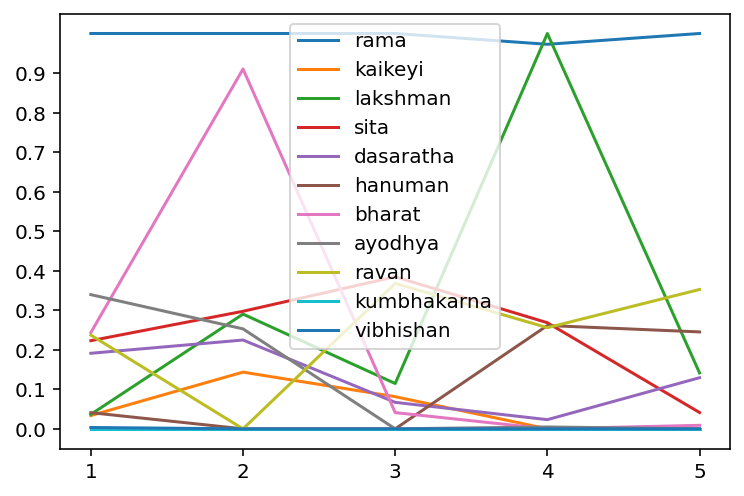

In [19]:
gen_centrality_plot(btw)
# if you dont remove graphs[0], like I have in btw calculation, then you will get div by 0 err, 
#cos there are only 2 people in g0

### PageRank

In [96]:
def PRCentrality(graphs):
    pgr = {}
    for i in range(len(graphs)):
        pgr[i] = nx.pagerank(graphs[i])
    return pgr

In [84]:
sorted(nx.pagerank(graphs[3],
        weight=None).items(),
        key=lambda x:x[1], reverse=True)[0:10]


[('rama', 0.046432886376510864),
 ('sita', 0.031073594535817425),
 ('indra', 0.02737565769100641),
 ('ravan', 0.0248534802111501),
 ('raghu', 0.02027285101266786),
 ('lakshman', 0.02014889124439045),
 ('dushan', 0.018567214532704088),
 ('brahma', 0.014608222522556679),
 ('dasaratha', 0.013468394403089173),
 ('khara', 0.013340327757912239)]

In [85]:
sorted(nx.pagerank(
    graphs[3], weight='Weight').items(),
    key=lambda x:x[1], reverse=True)[0:10]


[('rama', 0.092006936101649),
 ('lakshman', 0.03640943919458849),
 ('sita', 0.03135915066622435),
 ('indra', 0.027073078910220892),
 ('raghu', 0.025258105114861353),
 ('dushan', 0.02417182679193388),
 ('ravan', 0.021172415065250288),
 ('khara', 0.01647172273046724),
 ('maricha', 0.014965611512161265),
 ('dasaratha', 0.01199092427346258)]

<Figure size 720x720 with 0 Axes>

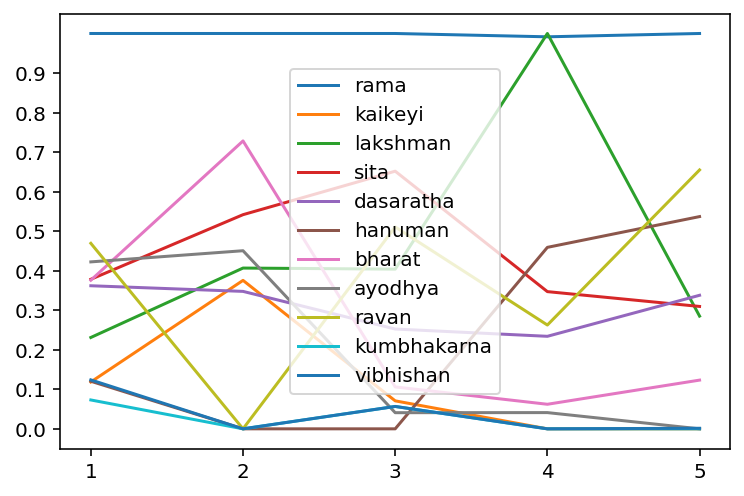

In [97]:
pgr = PRCentrality(graphs)
gen_centrality_plot(pgr)

Into clusts csv, insert cols from k means analysis(norm, freq etc) and also as cols(dc1, dc2, btw1...) and also each canto.
<br>
That will make for centralities - 494 * 3 + 5 * 3 cols, provided only 3 centrality metrics

In [87]:
494*3+5*3 # might be too many cols - 
# if chars are only 800 odd, then make chars cols, and all centralities indices

1497

In [ ]:
#instead of storing the whole thing, write functions for all info
# (eg, rankings given book/chap, metric for given char in given b/c etc), instead of putting it down in a csv

### Neighbours

In [24]:
G = graphs[1]
[G.neighbors('rama')]

d_neighs = (G['rohini'])
[k for k, v in d_neighs.items()]

['janak', 'rama']

## KCore

In [ ]:
len(graphs)

In [28]:
G = graphs[2]
kcore = nx.k_core(G, k=5)

len(G) #188
len(kcore)
#degeneracy @5 for g1
# D g2 - 8
# D g3 - 6
# D g4 - 6
# D g5 - 
#try 5, 6 for k

# for 3 : 5 gives a side story, but 6 gives the core
# 6 seems optimal to capture enough?, but will be too small to analyse anything; so 54
# 4 also doesnt seem bad - cos it seems to give a lot more networks, but not too many- 
#definitely simplified compared to the original and has the added adv of being detailed,
#  but might be too much for graphs like g1 - so toggle between 4 and 5? I doubt that ll change the meaning
# depends on how much info you need

35

In [29]:
nt = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", directed = False, filter_menu=True)
nt.from_nx(kcore)
nt.show('kcore.html', notebook=False)

kcore.html


## Text Summarization

https://medium.com/analytics-vidhya/text-summarization-using-bert-gpt2-xlnet-5ee80608e961

In [11]:
books = components.boot()
b1 = books['BOOK 1']

In [12]:
def preproc(text):
    text = unidecode.unidecode(text)
    text = text.replace("(", "").replace(")", "")
    text = re.sub("([0-9]*)", '', text)
    return text

In [13]:
b1 = preproc(b1)
b1

'    Canto I. Narad.   OM.  To sainted Narad, prince of those Whose lore in words of wisdom flows. Whose constant care and chief delight Were Scripture and ascetic rite, The good Valmiki, first and best Of hermit saints, these words addressed: "In all this world, I pray thee, who Is virtuous, heroic, true? Firm in his vows, of grateful mind, To every creature good and kind? Bounteous, and holy, just, and wise, Alone most fair to all men\'s eyes? Devoid of envy, firm, and sage, Whose tranquil soul ne\'er yields to rage? Whom, when his warrior wrath is high, Do Gods embattled fear and fly? Whose noble might and gentle skill The triple world can guard from ill? Who is the best of princes, he Who loves his people\'s good to see? The store of bliss, the living mine Where brightest joys and virtues shine? Queen Fortune\'s best and dearest friend, Whose steps her choicest gifts attend? Who may with Sun and Moon compare, With Indra, Vishnu, Fire, and Air? Grant, Saint divine, the boon I ask, F

### Transformers

In [ ]:
!pip install bert-extractive-summarizer


In [ ]:
!pip install spacy
!pip install transformers # > 4.0.0
# !pip install neuralcoref


In [ ]:
!python -m spacy download en_core_web_md


In [14]:
from summarizer import Summarizer,TransformerSummarizer

In [ ]:
model = Summarizer()

In [ ]:
text = "Learning NLP involves understanding basic principles of machine learning which then need to be customized for words. With the advent of using transfer learning for NLP I think it hads made a huge progress in terms of its research"
bert_summary = ''.join(model(text, min_length=60))
print(bert_summary)